In [1]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import pandas as pd
import numpy as np

In [2]:
G = nx.read_gpickle('../../data/processed/SP_multiGraph_Job_Edu_Level.gpickle')

In [3]:
print(nx.info(G))

Name: 
Type: MultiGraph
Number of nodes: 55492
Number of edges: 962038
Average degree:  34.6730


In [5]:
len(max(nx.connected_components(G), key=len)) / len(G.nodes)

0.9956390110286167

In [15]:
pop = len(G)
pop

55492

In [23]:
for r in  ['home', 'neighbor', 'work', 'school']:
    nodes = np.unique(np.array([[x,y] for x,y,z in G.edges(data=True) 
                       if z['edge_type']==r]).flatten()).shape[0]
    edges = np.sum([True for x,y,z in G.edges(data=True) 
                       if z['edge_type']==r])
    print(f'Nodes in {r}: {nodes}, {nodes/pop}')
    print(f'Edges in {r}: {edges}, {(edges*2)/nodes}')    

Nodes in home: 50696, 0.9135731276580408
Edges in home: 61634, 2.4315133343853557
Nodes in neighbor: 55469, 0.9995855258415628
Edges in neighbor: 348835, 12.577655988029349
Nodes in work: 26998, 0.4865205795429972
Edges in work: 342525, 25.374101785317432
Nodes in school: 12517, 0.22556404526778634
Edges in school: 209044, 33.4016138052249


In [356]:
np.mean(list(dict(nx.degree(G)).values()))

34.67303395083976

In [58]:
len(G)

55492

In [352]:
len(G.edges)

962038

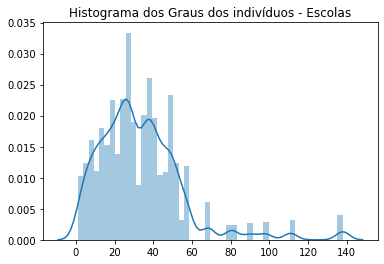

In [29]:
degree_school = defaultdict(int)
for e1,e2,v in G.edges(data=True):
    if v['edge_type'] == 'school':
        degree_school[e1] +=1
        degree_school[e2] +=1
sns.distplot(list(degree_school.values()))
plt.title('Histograma dos Graus dos indivíduos - Escolas')
plt.show()

In [31]:
np.median(list(degree_school.values()))

30.0

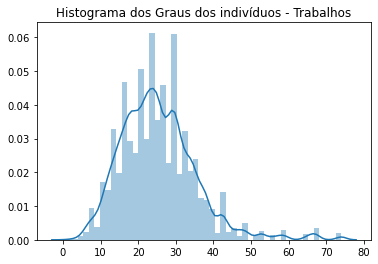

In [32]:
degree_work = defaultdict(int)
for e1,e2,v in G.edges(data=True):
    if v['edge_type'] == 'work':
        degree_work[e1] +=1
        degree_work[e2] +=1
sns.distplot(list(degree_work.values()))
plt.title('Histograma dos Graus dos indivíduos - Trabalhos')
plt.show()

In [34]:
np.median(list(degree_work.values()))

24.0

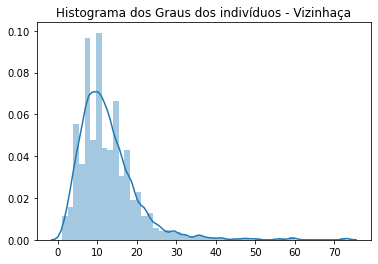

In [37]:
degree_neigbor = defaultdict(int)
for e1,e2,v in G.edges(data=True):
    if v['edge_type'] == 'neighbor':
        degree_neigbor[e1] +=1
        degree_neigbor[e2] +=1
sns.distplot(list(degree_neigbor.values()))
plt.title('Histograma dos Graus dos indivíduos - Vizinhaça')
plt.show()

In [38]:
np.median(list(degree_neigbor.values()))

11.0

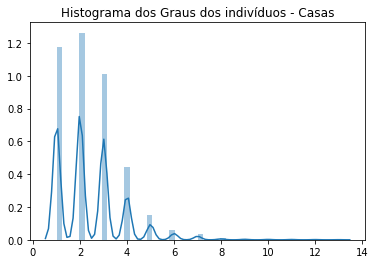

In [40]:
degree_home = defaultdict(int)
for e1,e2,v in G.edges(data=True):
    if v['edge_type'] == 'home':
        degree_home[e1] +=1
        degree_home[e2] +=1
sns.distplot(list(degree_home.values()))
plt.title('Histograma dos Graus dos indivíduos - Casas')
plt.show()

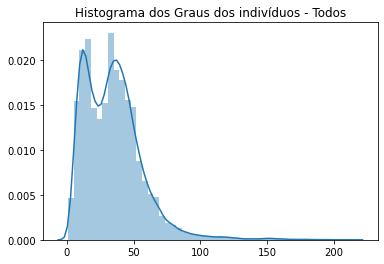

In [50]:
degree = defaultdict(int)
for e1,e2,v in G.edges(data=True):
    #if v['edge_type'] == 'home':
    degree[e1] +=1
    degree[e2] +=1
sns.distplot(list(degree.values()))
plt.title('Histograma dos Graus dos indivíduos - Todos')
plt.show()

In [54]:
pd.Series(list(degree.values())).dropna()

0         63
1         88
2         15
3         41
4        102
        ... 
55482      8
55483      8
55484     10
55485      9
55486      9
Length: 55487, dtype: int64

In [57]:
np.mean(list(degree.values()))

34.67615837944023

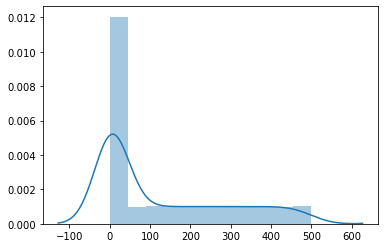

In [18]:
sns.distplot(nx.relaxed_caveman_graph(100, 5, 0.2).degree)

In [23]:
[v['job_level'] for n,v in G.nodes(data=True)]


{'work': 3.0, 'school': nan, 'home': 1.0, 'job_level': 2.0, 'education': 1.0, 'age': 59.0, 'private_healthcare': False, 'home_id': '00010001', 'home_x': 333743.0, 'home_y': 7394463.0, 'school_x': nan, 'school_y': nan, 'work_x': 333104.0, 'work_y': 7394476.0, 'criterio_br': 4.0}


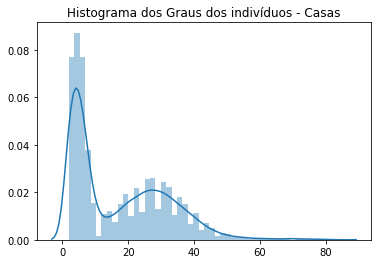

In [22]:
degree_school = {k: 0 for k in G.nodes}
for e1,e2,v in G.edges(data=True):
    if v['edge_type'] == 'home':
        degree_work[e1] +=1
        degree_work[e2] +=1
sns.distplot(list(degree_work.values()))
plt.title('Histograma dos Graus dos indivíduos - Casas')
plt.show()

In [7]:
edges = defaultdict(int)
for n,v in G.nodes(data=True):
    if not np.isnan(v['work']):
        edges[(int(v['home']), int(v['work']))] +=1
    if not np.isnan(v['school']):
        edges[(int(v['home']), int(v['school']))] +=1
    #edges((v['zone'], v['zone'])) += 2

In [8]:
SP = nx.DiGraph()

In [9]:
for e,w in edges.items():
    SP.add_edge(e[0], e[1], weight=w, distance=1/w)

In [10]:
print(nx.info(SP))

Name: 
Type: DiGraph
Number of nodes: 338
Number of edges: 14094
Average in degree:  41.6982
Average out degree:  41.6982


In [11]:
len(max(nx.weakly_connected_components(SP), key=len))

338

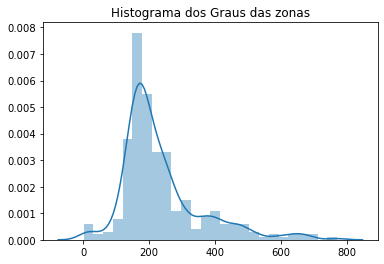

In [44]:
sns.distplot(list(weighted_degree_centrality(SP).values()))
plt.title('Histograma dos Graus das zonas')
plt.show()

In [12]:
distritos = pd.read_csv('distritos.csv', sep=';')
distritos = distritos[distritos['municipio'] == 'São Paulo']
distritos = distritos[['zona', 'nome', 'popu']].reset_index(drop=True).copy()
distritos['popu'] = pd.to_numeric(distritos['popu'], errors='coerce').fillna(0).astype('int')

In [13]:
def weighted_degree_centrality(G):
    return {k:v for k,v in dict(G.degree(weight='weight')).items()}

measures = [weighted_degree_centrality, nx.betweenness_centrality, nx.closeness_centrality, nx.pagerank_numpy, nx.eigenvector_centrality_numpy]
names = ['degree', 'betweenness', 'closeness', 'pagerank', 'eigenvector']

for m,n in zip(measures, names):
    print(n)
    if n in ['betweenness', 'pagerank', 'eigenvector']:
        measure_dict = m(SP, weight='weight')
    elif n in ['closeness']:
        measure_dict = m(SP, distance='distance')
    else:
        measure_dict = m(SP)
    distritos[n] = distritos['zona'].map(measure_dict).rank(pct=True)

distritos['average'] = distritos[names].mean(axis=1)
distritos = distritos.sort_values('average', ascending=False).dropna()

degree
betweenness
closeness
pagerank
eigenvector


In [14]:
distritos.drop('zona', axis=1).set_index('nome').style.background_gradient(cmap=sns.cm.rocket_r)

In [333]:
egos = [41423, 47761, 36304]

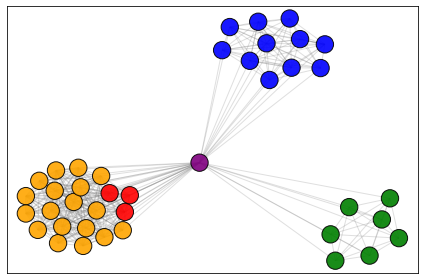

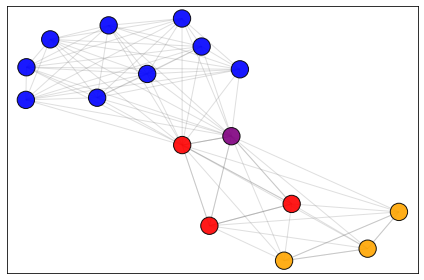

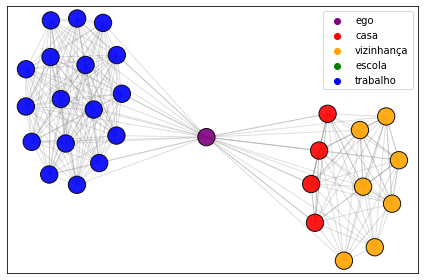

In [350]:
import matplotlib.pyplot as plt

for ego in egos:

    #ego = np.random.choice(list(G.nodes))

    ego_net = nx.ego_graph(G, ego)
    color_relation = {'home': 'red', 'neighbor': 'orange', 'school': 'green', 'work': 'blue'}
    color_relation_pt = {'casa': 'red', 'vizinhança': 'orange', 'escola': 'green', 'trabalho': 'blue'}

    color_to_numeral = {'red': 1, 'orange': 2, 'green': 3, 'blue': 4, 'purple': 5}
    colors = {(y if x==ego else x): color_relation[v['edge_type']] 
                                    for x,y,v in ego_net.edges(data=True)
                                    if x == ego or y == ego}
    for x,y,v in ego_net.edges(data=True):
        if x == ego:
            key = y
        elif y == ego:
            key = x
        else:
            key = None

        if key is not None:
            if v['edge_type'] == 'home':
                colors[key] = color_relation['home']

    colors[ego] = 'purple'

    #plt.axis("off")  # turn of axis
    pos = nx.spring_layout(ego_net)
    nx.draw_networkx_nodes(ego_net, pos, nodelist= list(colors.keys()), node_color=list(colors.values()), 
                           alpha=0.9, linewidths=1, edgecolors='black')
    nx.draw_networkx_edges(ego_net, pos, alpha=0.25, edge_color='gray')
    if ego == 36304:
        ax = plt.gca()
        ax.scatter([],[], color='purple', label='ego')
        for k,v in color_relation_pt.items():
            ax.scatter([],[], color=v, label=k)

        plt.legend()
    plt.tight_layout()
    
    plt.savefig(f"ego_nets/ego_net{ego}.pdf")
    plt.show();

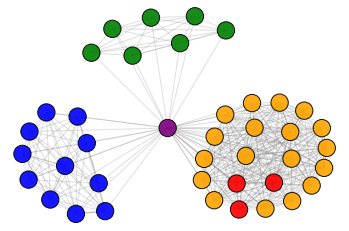

In [330]:
plt.axis("off")  # turn of axis
pos = nx.kamada_kawai_layout(ego_net)
nx.draw_networkx_nodes(ego_net, pos, nodelist= list(colors.keys()), node_color=list(colors.values()), 
                       alpha=0.9, linewidths=1, edgecolors='black')
nx.draw_networkx_edges(ego_net, pos, alpha=0.25, edge_color='gray')
plt.savefig(f"ego_net{ego}.pdf")

In [ ]:
nodes = [{"id": int(k), "group": color_to_numeral[v]} for k,v in colors.items()]
links = [{"source": int(x), "target": int(y), "value": v['edge_type']} for x,y,v in ego_net.edges(data=True)]
ego_net_json = {"nodes": nodes, "links": links}

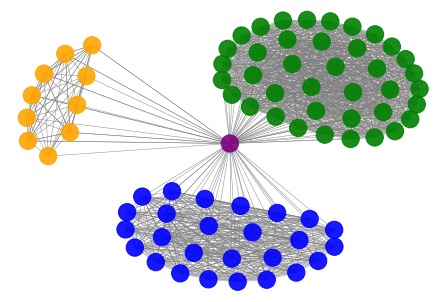

In [132]:
nx.draw_kamada_kawai(, edge_color='gray',
                    width = 0.5)